In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import cv2
import itertools
from keras.models import load_model

Using TensorFlow backend.


In [2]:
model = None
model = load_model("models/vgg_1a.h5")
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
______________________

In [3]:
def tensor_3to4(img):
    '''
    Resizes and expands dimension
    
    Input: img: a 3-channel image as input
    
    Returns a rank-4 tensor, since the network accepts batches of images
    One image corresponds to batch size of 1
    '''
    img = cv2.resize(img, (200, 200))
    img_4d = np.expand_dims(img, axis=0)  # rank 4 tensor for prediction
    return img_4d

In [4]:
def inference(img):
    '''Accepts a single input image of rank-4 and makes predictions and 
    returns the predicted label
    '''
    res = ""
    #import pdb; pdb.set_trace()
    img = tensor_3to4(img)
    y_pred = model.predict(img)
    print(y_pred)
    y = np.argmax(y_pred)
    print(y)
    
    if y == 1:
        res = "Parasite!"
    else:
        res = "Not parasite"
    return res
        
    

### Few test runs!

In [5]:
img = cv2.imread("test_images/parasite.png") 
label = inference(img)
label

[[1.7349135e-04 9.9982649e-01]]
1


'Parasite!'

In [6]:
img = cv2.imread("test_images/uninf3.png") 
label = inference(img)
label

[[0.9964832  0.00351677]]
0


'Not parasite'

In [7]:
img = cv2.imread("test_images/para2.png") 
label = inference(img)
label

[[7.2168588e-04 9.9927837e-01]]
1


'Parasite!'

In [8]:
x_test = np.load("test_data/x_test.npy")
y_test = np.load("test_data/y_test.npy")
x_test.shape, y_test.shape

((2756, 200, 200, 3), (2756, 2))

In [9]:
y_preds = model.predict(x_test, verbose=1)
y_preds.shape

2756/2756 [==============================] - 1103s 400ms/step


(2756, 2)

In [10]:
y_test.shape, y_preds.shape

((2756, 2), (2756, 2))

In [11]:
y_pred_flat = np.argmax(y_preds, axis=1)
y_test_flat = np.argmax(y_test, axis=1)
y_pred_flat.shape, y_test_flat.shape

((2756,), (2756,))

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true = y_test_flat, y_pred = y_pred_flat)
print(cm)

[[1347   62]
 [ 101 1246]]


In [13]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

target_names = ['0', '1']

def plot_confusion_matrix(cm, classes,
                          normalize=False, #if true all values in confusion matrix is between 0 and 1
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1347   62]
 [ 101 1246]]


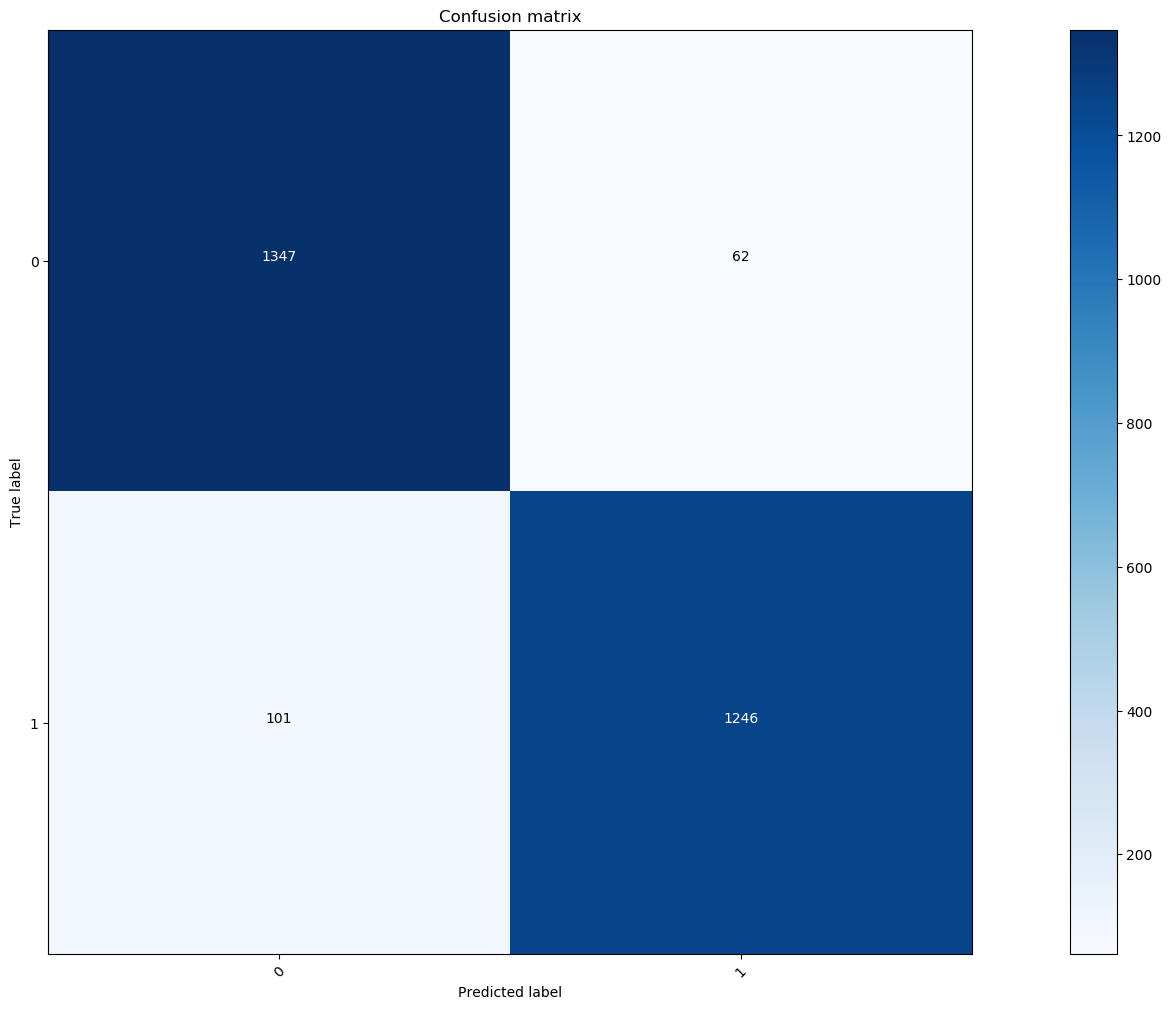

In [14]:
plt.figure(figsize=(20,10), dpi=100)
plot_confusion_matrix(cm, classes=target_names,
                  title='Confusion matrix')
plt.show()

In [15]:
import numpy as np

np.save("y_preds.npy", y_preds)

[1. 0.]
[0.9488008  0.05119915]
0


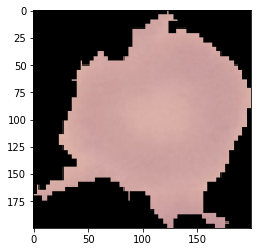

In [16]:
num = 3
plt.imshow(x_test[num])
print(y_test[num])
print(y_preds[num])
print(np.argmax(y_preds[num]))

[0. 1.]
[0.00178276 0.99821717]
1


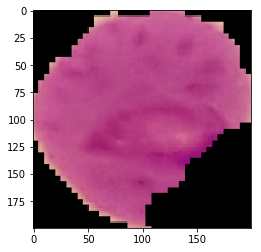

In [17]:
num = 5
plt.imshow(x_test[num])
print(y_test[num])
print(y_preds[num])
print(np.argmax(y_preds[num]))

In [19]:
y_test.shape, y_preds.shape

((2756, 2), (2756, 2))

In [20]:
res = np.absolute(y_test - y_preds)
res.shape

(2756, 2)

In [21]:
res[56]

array([0.00127262, 0.00127264], dtype=float32)

In [22]:
y_pred_flat.shape, y_test_flat.shape

((2756,), (2756,))

In [23]:
print(y_pred_flat[4])
print(y_test_flat[4])

0
0


In [51]:
index = []

for i in range(len(x_test)):
    if y_test_flat[i] != y_pred_flat[i]:
        index.append(x_test[i])

print(len(index))

163


In [54]:
index[1].shape

(200, 200, 3)

In [57]:
len(index)

163

In [59]:
count = 0
for i in index:
    cv2.imwrite("{}.jpg".format(count), i)
    count+=1
    
print("Done!")

Done!


In [28]:
cn = 0

miss_img = []

for i in range(len(x_test)):
    if y_test_flat[i]==1 and y_pred_flat[i]==0:
        miss_img.append(x_test[i])
        cn+=1

print(len(miss_img))

101


In [27]:
FN = np.array(miss_img)
FN.shape

(62, 200, 200, 3)

In [29]:
FP = np.array(miss_img)
FP.shape

(101, 200, 200, 3)

In [30]:
FN.shape, FP.shape

((62, 200, 200, 3), (101, 200, 200, 3))

In [69]:
count = 0
for i in miss_img:
    cv2.imwrite("{}.jpg".format(count), i)
    count+=1
    
print("Done!")

Done!


In [12]:
x_test.shape

(2756, 200, 200, 3)

In [13]:
len(x_test)

2756

In [32]:
import pylab 

def show_images(images, cols = 1, titles = None, save_fig = "default"):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    #fig.set_title("Samples of infected red blood cells")
    
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        plt.axis("off")
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.savefig('{}'.format(save_fig), dpi=10)
    plt.show()

In [15]:
y_test_flat = np.argmax(y_test, axis=1)
y_test_flat.shape

(2756,)

In [20]:
parasite_images = []

for i in range(len(x_test)):
    if y_test_flat[i] == 1:
        parasite_images.append(x_test[i])
        
len(parasite_images)

1347

In [21]:
uninf_images = []

for i in range(len(x_test)):
    if y_test_flat[i] == 0:
        uninf_images.append(x_test[i])
        
len(uninf_images)

1409

In [22]:
parasite_images = np.array(parasite_images)
uninf_images = np.array(uninf_images)
parasite_images.shape, uninf_images.shape

((1347, 200, 200, 3), (1409, 200, 200, 3))

In [35]:
FN.shape, FP.shape

((62, 200, 200, 3), (101, 200, 200, 3))

### False negatives (0 but 1)

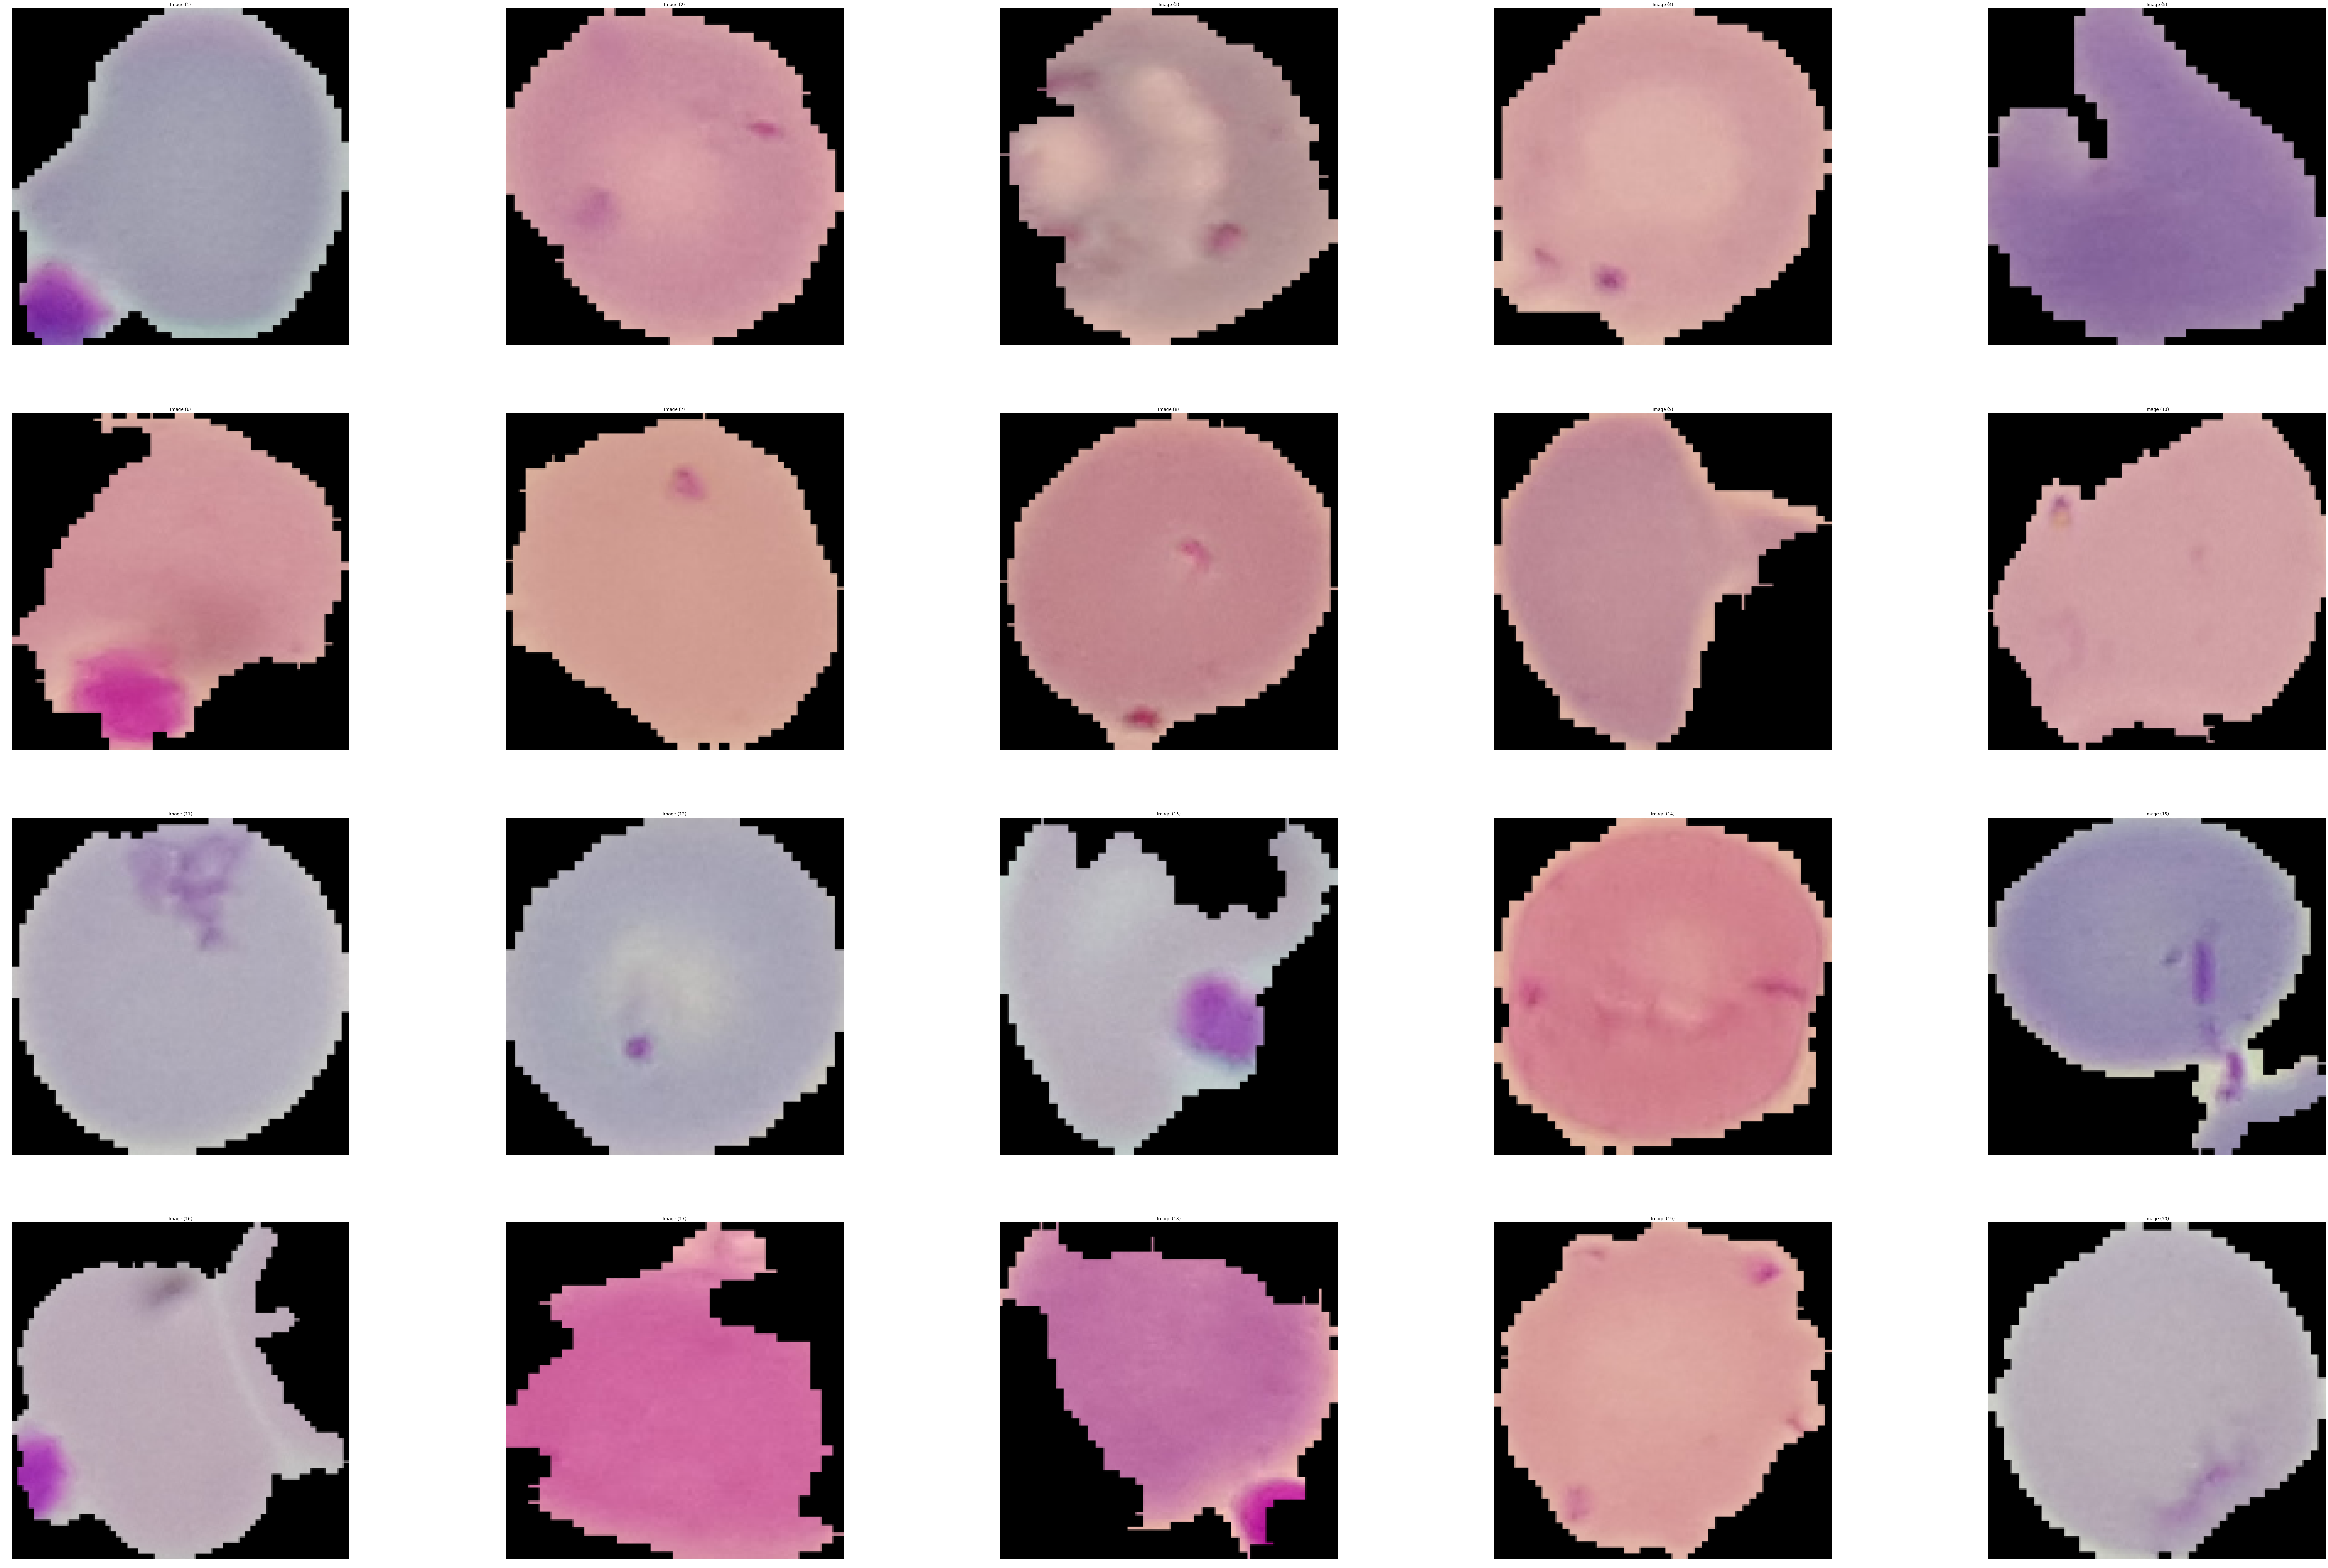

In [37]:
show_images(FN[0:20], cols = 4, titles = None, save_fig="FN")

### False postives (1 but 0)

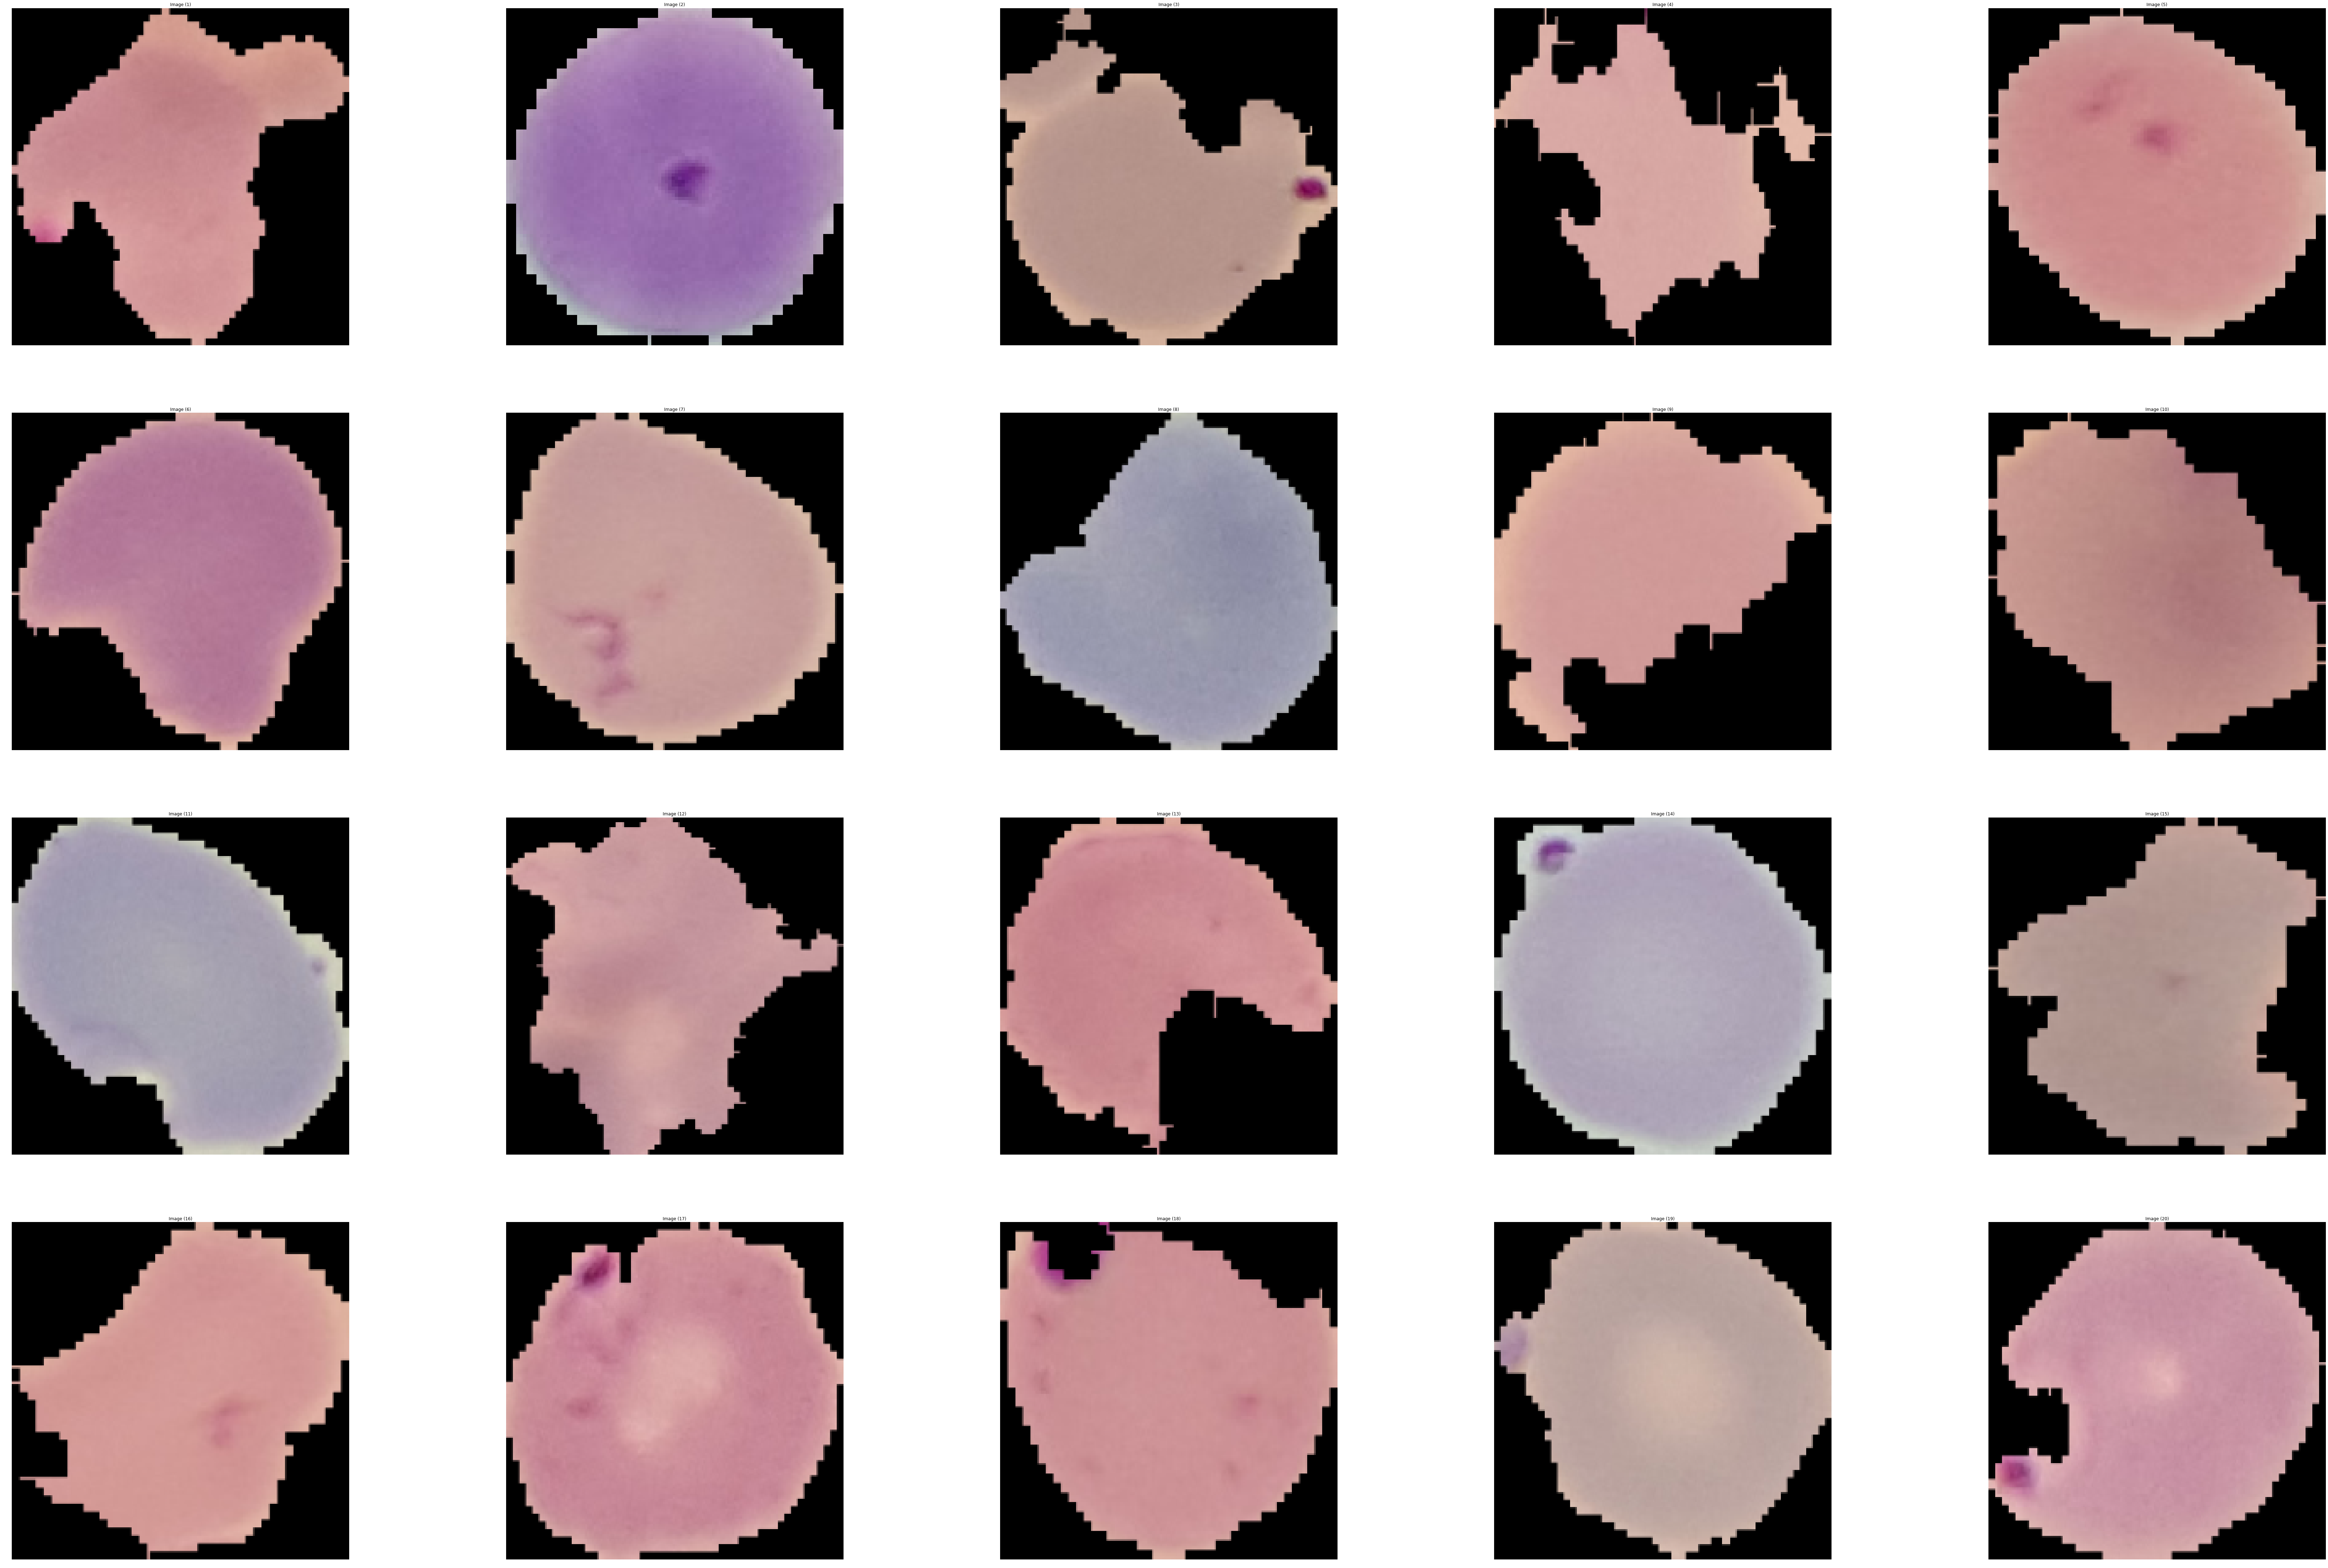

In [39]:
show_images(FP[20:40], cols = 4, titles = None, save_fig="FP")